<a href="https://colab.research.google.com/github/sneharaoganta/Depth_ESTIMATION_MML/blob/main/Depth_Estimation_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing required libraries
Note: I was doing this in the google colab notebook.So mounted by google drive.In case if you are doing this in your local machine, the respective directories are to be changed accordingly

In [ ]:
from google.colab import drive
import requests


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This below code will download the dataset from URL that was pasted at 'file_url'

In [ ]:
#paste the url here
file_url = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip"

r = requests.get(file_url, stream = True)  
  
#change this according ur file extension
with open("/content/gdrive/My Drive/2011_09_26_drive_0001_sync.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

In [ ]:
#extracting
from zipfile import ZipFile
with ZipFile("/content/gdrive/MyDrive/data_depth_annotated.zip") as f:
    f.extractall()

In [ ]:
#extracting
from zipfile import ZipFile
with ZipFile("/content/gdrive/MyDrive/2011_09_26_drive_0001_sync.zip") as f:
    f.extractall()

In [ ]:
import pandas as pd
import cv2 
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import os
from collections import deque
import copy
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import *

%matplotlib inline

In [ ]:

frames_main = sorted(os.listdir('/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data'))
i=0
frames_list = []
# for video_name in videos:
#   list_frame = sorted(os.listdir('./training/image_02/%s'%video_name))
#   frames_list.append(list_frame)
  
frames_main

['0000000000.png',
 '0000000001.png',
 '0000000002.png',
 '0000000003.png',
 '0000000004.png',
 '0000000005.png',
 '0000000006.png',
 '0000000007.png',
 '0000000008.png',
 '0000000009.png',
 '0000000010.png',
 '0000000011.png',
 '0000000012.png',
 '0000000013.png',
 '0000000014.png',
 '0000000015.png',
 '0000000016.png',
 '0000000017.png',
 '0000000018.png',
 '0000000019.png',
 '0000000020.png',
 '0000000021.png',
 '0000000022.png',
 '0000000023.png',
 '0000000024.png',
 '0000000025.png',
 '0000000026.png',
 '0000000027.png',
 '0000000028.png',
 '0000000029.png',
 '0000000030.png',
 '0000000031.png',
 '0000000032.png',
 '0000000033.png',
 '0000000034.png',
 '0000000035.png',
 '0000000036.png',
 '0000000037.png',
 '0000000038.png',
 '0000000039.png',
 '0000000040.png',
 '0000000041.png',
 '0000000042.png',
 '0000000043.png',
 '0000000044.png',
 '0000000045.png',
 '0000000046.png',
 '0000000047.png',
 '0000000048.png',
 '0000000049.png',
 '0000000050.png',
 '0000000051.png',
 '0000000052

In [ ]:
import pandas as pd
frames_gt = sorted(os.listdir('/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02'))
i=0
frames_list = []
# for video_name in videos:
#   list_frame = sorted(os.listdir('./training/image_02/%s'%video_name))
#   frames_list.append(list_frame)
  
frames_gt

['0000000005.png',
 '0000000006.png',
 '0000000007.png',
 '0000000008.png',
 '0000000009.png',
 '0000000010.png',
 '0000000011.png',
 '0000000012.png',
 '0000000013.png',
 '0000000014.png',
 '0000000015.png',
 '0000000016.png',
 '0000000017.png',
 '0000000018.png',
 '0000000019.png',
 '0000000020.png',
 '0000000021.png',
 '0000000022.png',
 '0000000023.png',
 '0000000024.png',
 '0000000025.png',
 '0000000026.png',
 '0000000027.png',
 '0000000028.png',
 '0000000029.png',
 '0000000030.png',
 '0000000031.png',
 '0000000032.png',
 '0000000033.png',
 '0000000034.png',
 '0000000035.png',
 '0000000036.png',
 '0000000037.png',
 '0000000038.png',
 '0000000039.png',
 '0000000040.png',
 '0000000041.png',
 '0000000042.png',
 '0000000043.png',
 '0000000044.png',
 '0000000045.png',
 '0000000046.png',
 '0000000047.png',
 '0000000048.png',
 '0000000049.png',
 '0000000050.png',
 '0000000051.png',
 '0000000052.png',
 '0000000053.png',
 '0000000054.png',
 '0000000055.png',
 '0000000056.png',
 '0000000057

In [ ]:
train_data_path = os.path.join('content','train')
test_data_path = os.path.join('content','test')



In [ ]:
if not os.path.exists('data_files'):
  os.mkdir('data_files')
if not os.path.exists('data_files/train'):
  os.mkdir('data_files/train')
if not os.path.exists('data_files/test'):
  os.mkdir('data_files/test')


# Making CSV file with paths of both image and ground truth along with the video name

In [ ]:
train_dir = "/content/2011_09_26/"
data_dir_list = sorted(os.listdir(train_dir))
# print(data_dir_list)
for data_dir in data_dir_list:
  video_dir = (data_dir+"/image_02")
  ground_data_dir_list = sorted(os.listdir("/content/train/"+data_dir+"/proj_depth/groundtruth/image_02"))
  video_data_dir_list = sorted( os.listdir(train_dir+video_dir+"/data"))
  train_df = pd.DataFrame(columns = ['ImagePath','GroundTruthPath','VideoName'])
  

  # print(ground_data_dir_list)

  for img in ground_data_dir_list: # looping over every frame within the video
      img_path = os.path.join(train_dir,video_dir,"data",img)
      gt_path = os.path.join("/content/train",data_dir,"proj_depth/groundtruth/image_02",img)
      # print(img_path,gt_path)
      train_df = train_df.append({'ImagePath':img_path,'GroundTruthPath':gt_path,'VideoName':data_dir},ignore_index=True)
  file_name = '{}.csv'.format(data_dir)
  train_df.to_csv('/content/data_files/train/{}'.format(file_name))

os.path.abspath(data_dir_list[0])
  

'/content/2011_09_26_drive_0001_sync'

# Functions to generate the images in batches to feed into the data generator

In [ ]:
from collections import deque 

def file_generator(data_path,data_files,temporal_stride=1,temporal_length=16):
    '''
    data_files - list of csv files to be read.
    '''
    for f in data_files: # read all the csv files (one csv file corresponds to one vdieo) in data_files one by one
        tmp_df = pd.read_csv(os.path.join(data_path,f))
        gt_list = list(tmp_df['GroundTruthPath'])  # Load all the labels in the label_list
        total_images = len(gt_list) 
        print(total_images)
        if total_images>=temporal_length: # only if the number of frames in the video is greater tha temporal length, use that video
            num_samples = int((total_images-temporal_length)/temporal_stride)+1
            print ('num of samples from vid seq-{}: {}'.format(f,num_samples))
            img_list = list(tmp_df['ImagePath'])
            
            # print("List is : ",gt_list)
        else: # if the number of frames are less than temporal length , discard it
            print ('num of frames is less than temporal length; hence discarding this file-{}'.format(f))
            continue

        start_frame = 0
        samples = deque() # initliaze a queue to store the frames 
        groundtruth = deque()
        gtcount=0
        samp_count=0 # a counter to count the number of smaple. one smaple has as many frames as defined by temporal length
        for img,gt_img in zip(img_list,gt_list):
            samples.append(img)
            groundtruth.append(gt_img)
            if len(samples)==temporal_length: #if the queue has as many frames as temporal length, return it as one sample
                samples_c=copy.deepcopy(samples) # copy the queue as in the next stage frames would be popped
                samples_gt = copy.deepcopy(groundtruth)
                # print("gt is ", samples_gt)
                samp_count+=1
                gtcount+=1
                for t in range(temporal_stride): # pop out as many frames as described by the stride from the left to accomodate new frames
                    samples.popleft()
                    groundtruth.popleft()
                yield samples_c,samples_gt # return a sample(consisting of as many frames as defined by temporal length) 
                                                # and its corsponding label

[a,b],[c,d]

a,c
b,d


[0002,ooo3]
[00001gt,0002gt]

In [ ]:
def load_samples(data_cat='train',temporal_stride=1,temporal_length=16):
    data_path = os.path.join('/content/data_files',data_cat)
    data_files = os.listdir(data_path)
    # define a generator to read the samples
    file_gen = file_generator(data_path,data_files,temporal_stride,temporal_length)
    iterator = True
    data_list = []
    i=0;
    while iterator:
        try:
            x,y = next(file_gen)
            x=list(x)
            y=list(y)
            data_list.append([x,y])
            # print("Done", i, "times")
            # i = i+1
        except Exception as e:
            print ('the exception: ',e)
            iterator = False
            print ('end of data generator')
    return data_list

In [ ]:
training_data = load_samples(data_cat='train',temporal_stride=1,temporal_length=10)
training_data

98
num of samples from vid seq-2011_09_26_drive_0001_sync.csv: 89
the exception:  
end of data generator


[[['/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000005.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000006.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000007.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000008.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000009.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000010.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000011.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000012.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000013.png',
   '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000014.png'],
  ['/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/0000000005.png',
   '/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/000000

In [ ]:
# img = ((training_data[0][1][1]))
# img = cv2.imread(img)
# print(img)
# dim = (256, 256)
# img = cv2.resize(img, dim)
# np.shape(img)
np.shape(training_data)

(89, 2, 10)

In [ ]:
# # batch_suze=18
# indexes = np.arange(len(training_data))
# # index = indexes[index*batch_size
# #       :(index+1)*batch_size]

# # list_IDs_temp = [self.list_IDs[k] for k in index]
# x = training_data[0][0]
# y = training_data[0][1]
# for img, gt in zip(x,y):
#   print(img, gt)

training_data[1]
  
  


[['/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000006.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000007.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000008.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000009.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000010.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000011.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000012.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000013.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000014.png',
  '/content/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000015.png'],
 ['/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/0000000006.png',
  '/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/0000000007.png',
 

# Data generator function

In [ ]:
import keras
class DataGenerator(keras.utils.Sequence):
  def __init__(self,data,batch_size,dim,is_autoencoder,shuffle):
    #Initializing the values
    self.dim = dim
    self.data  = data
    self.batch_size = batch_size
    self.list_IDs = np.arange(len(data))
    self.is_autoencoder = is_autoencoder
    self.shuffle = shuffle
    self.on_epoch_end()
    self.n = 0
    self.max = self.__len__()
  

  def on_epoch_end(self): 
    self.indexes = self.list_IDs  #Load the indexes of the data
    if self.shuffle == True:
      np.random.shuffle(self.indexes)

  def __len__(self): 
    return int(np.floor(len(self.data)/self.batch_size))


  def __getitem__(self, index):
    #Generate batch at position 'index' 
    print("Index is ",index)
    index = self.indexes[index*self.batch_size
      :(index+1)*self.batch_size]
    #Generate a temporary list of indexes that forms a batch based on  ##the index selected above.
    list_IDs_temp = [self.list_IDs[k] for k in index]
    #Generate batch
    X,y = self.__data_generation(list_IDs_temp)
    return X,y

  def __data_generation(self,list_IDs_temp):
    X_data = []
    y_data = []
    for i,_ in enumerate(list_IDs_temp): #Iterating through each ######################################sequence of frames
      # seq_frames = list(self.data.iloc[i,1])
      # y = list(self.data.iloc[i,2])
      temp_data_list = []
      temp_gt_list = []
      x = self.data[i][0]
      y = self.data[i][1]
      for img, gt in zip(x,y):
        # print(img, gt)
        try:
          # print(img, gt)
          image = cv2.imread(img)
          # print("img is ", np.shape(image))
          ext_img = cv2.resize(image,self.dim)
          image_gt = cv2.imread(gt)
          
          ext_img_gt = cv2.resize(image_gt,self.dim)
          # print("this also happen")
          temp_data_list.append(ext_img)
          temp_gt_list.append(ext_img_gt) 
        except Exception as e: 
          print("Code you'd want to run in case of an exception/err")
        
      X_data.append(temp_data_list)
      y_data.append(temp_gt_list)
    X = np.array(X_data) #Converting list to array
    y = np.array(y_data)
    print("Checking... ",X,y)
    if self.is_autoencoder == True:
      return X, X
    else:
      return X, y

  def __next__(self):
        if self.n >= self.max:
           self.n = 0
        result = self.__getitem__(self.n)
        self.n += 1
        return result

In [ ]:
params = {
'batch_size':18,
'dim':(256,256),
'is_autoencoder':False,
'shuffle':True }

# df = pd.read_csv("/content/data_files/train/2011_09_26_drive_0001_sync.csv")
X,Y = next(DataGenerator(training_data,**params))


Index is  0
Checking...  [[[[[ 12  13  11]
    [  9  14  11]
    [ 16  23  18]
    ...
    [ 20  26  29]
    [  8  14  13]
    [ 16  26  10]]

   [[ 13  13  11]
    [ 11  14   9]
    [ 15  16  11]
    ...
    [ 19  25  22]
    [ 11  14  15]
    [  9  11   7]]

   [[ 14  15  11]
    [ 11  16  12]
    [ 14  20  18]
    ...
    [ 17  23  18]
    [ 14  15  20]
    [  8  10   8]]

   ...

   [[ 44  33  27]
    [ 43  34  28]
    [ 42  34  26]
    ...
    [ 54  60  79]
    [ 56  70  82]
    [ 53  80  68]]

   [[ 45  35  27]
    [ 42  34  26]
    [ 43  34  26]
    ...
    [ 64  74  95]
    [ 52  64  67]
    [ 53  72  89]]

   [[ 44  35  26]
    [ 43  34  24]
    [ 45  36  28]
    ...
    [ 75  84 112]
    [ 56  62  81]
    [ 53  59  81]]]


  [[[ 13  17  11]
    [ 24  21  18]
    [ 26  29  21]
    ...
    [ 44  45  39]
    [ 34  50  31]
    [ 37  66  34]]

   [[ 16  15  15]
    [ 19  17  16]
    [ 19  24  11]
    ...
    [ 36  48  66]
    [ 44  58  60]
    [ 58  83  54]]

   [[ 16  16  18]
   

In [ ]:
print(np.shape(X))
x_0 = X[0]
y_0 = Y[0]

(18, 10, 256, 256, 3)


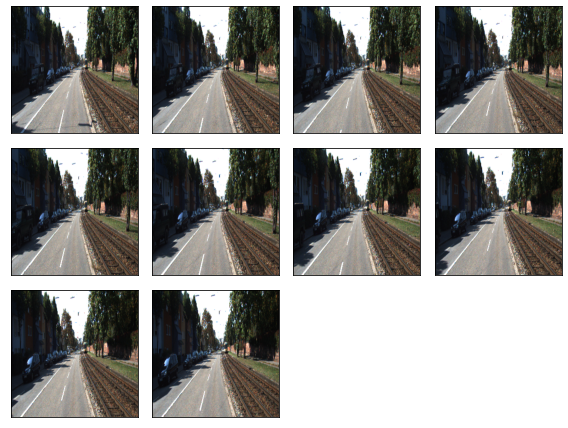

In [ ]:
num_of_images=10
fig=plt.figure(figsize=(8,8)) 
subplot_num = int(np.ceil(np.sqrt(num_of_images)))
for i in range(int(num_of_images)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(x_0[i,:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

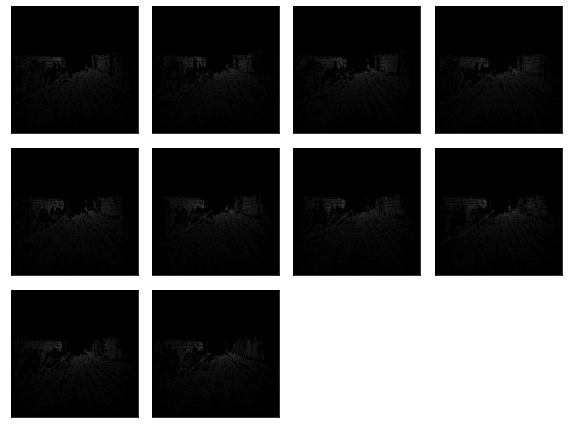

In [ ]:
num_of_images=10
fig=plt.figure(figsize=(8,8)) 
subplot_num = int(np.ceil(np.sqrt(num_of_images)))
for i in range(int(num_of_images)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(y_0[i,:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

# Spatial Temporal Model 


In [ ]:
import keras
from keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB1

input_img = keras.Input(shape=(None,256, 256, 3))
encoded = tf.keras.layers.TimeDistributed(EfficientNetB1(input_shape=(256, 256, 3),include_top=False,weights='imagenet'))(input_img)


x = tf.keras.layers.TimeDistributed(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))(encoded)
x = tf.keras.layers.TimeDistributed(layers.UpSampling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))(x)
x = tf.keras.layers.TimeDistributed(layers.UpSampling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))(x)
x = tf.keras.layers.TimeDistributed(layers.UpSampling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))(x)
x = tf.keras.layers.TimeDistributed(layers.UpSampling2D((2, 2)))(x)
decoded = tf.keras.layers.TimeDistributed(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))(x)

clstm_out = layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True )(decoded)


autoencoder = keras.Model(input_img, clstm_out)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

27025408/27018416 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 256, 256, 3 0         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 8, 8, 1280)  6575239   
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 8, 8, 512)   5898752   
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 16, 16, 512) 0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 16, 16, 128) 589952    
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 32, 32, 128) 0         
______________________________________________________________

In [ ]:
result = autoencoder.fit_generator(generator=DataGenerator(training_data,**params), use_multiprocessing=True)
rsult2 = autoencoder.predict

# Loss Function


In [ ]:
class Sobel(torch.nn.Module):
	def __init__(self):
		super(Sobel, self).__init__()
		self.edge_conv = torch.nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1, bias=False)
		edge_kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
		edge_ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
		edge_k = np.stack((edge_kx, edge_ky))

		edge_k = torch.from_numpy(edge_k).float().view(2, 1, 3, 3)
		self.edge_conv.weight = torch.nn.Parameter(edge_k)
		
		for param in self.parameters():
			param.requires_grad = False

	def forward(self, x):
		out = self.edge_conv(x) 
		out = out.contiguous().view(-1, 2, x.size(2), x.size(3))
  
		return out

In [ ]:
import torch
def cal_spatial_loss(output, depth_gt):

	losses=[]

	for depth_index in range(len(output)):

		cos = torch.nn.CosineSimilarity(dim=1, eps=0)
		get_gradient = Sobel()
		ones = torch.ones(depth_gt.shape[0], 1, depth_gt.shape[2],depth_gt.shape[3]).float()
		ones = torch.autograd.Variable(ones)
		depth_grad = get_gradient(depth_gt)
		output_grad = get_gradient(output)
		depth_grad_dx = depth_grad[:, 0, :, :].contiguous().view_as(depth_gt)
		depth_grad_dy = depth_grad[:, 1, :, :].contiguous().view_as(depth_gt)
		output_grad_dx = output_grad[:, 0, :, :].contiguous().view_as(depth_gt)
		output_grad_dy = output_grad[:, 1, :, :].contiguous().view_as(depth_gt)

		depth_normal = torch.cat((-depth_grad_dx, -depth_grad_dy, ones), 1)
		output_normal = torch.cat((-output_grad_dx, -output_grad_dy, ones), 1)

		cof = 0.5

		loss_depth = torch.log(torch.abs(output - depth_gt) + cof).mean()
		loss_dx = torch.log(torch.abs(output_grad_dx - depth_grad_dx) + cof).mean()
		loss_dy = torch.log(torch.abs(output_grad_dy - depth_grad_dy) + cof).mean()
		loss_normal = torch.abs(1 - cos(output_normal, depth_normal)).mean()

		loss = loss_depth + loss_normal + (loss_dx + loss_dy)

		losses.append(loss)

	spatial_loss = sum(losses)
	
	return spatial_loss

In [ ]:
def my_func(arg):
  arg = torch.from_numpy(arg)
  return arg
temp1 = my_func(Y[0])
temp2 = my_func(Y[2])
print(temp1.shape)
Sobel()(temp1)


torch.Size([10, 256, 256, 3])


RuntimeError: ignored

In [ ]:
def cal_spatial_loss(output, depth_gt):
  losses=[]
  for depth_index in range(len(output)):
    cos = tf.keras.losses.CosineSimilarity()
    # get_gradient = Sobel().cuda()
    ones = tf.ones(depth_gt.shape[0], 1, depth_gt.shape[2],depth_gt.shape[3]).float()
    # ones = tf.autograd.Variable(ones)
    depth_grad = tf.image.sobel_edges(depth_gt)
    output_grad = tf.image.sobel_edges(output)
    
    depth_grad_dx = depth_grad[:, 0, :, :].contiguous().view_as(depth_gt)
    depth_grad_dy = depth_grad[:, 1, :, :].contiguous().view_as(depth_gt)
    output_grad_dx = output_grad[:, 0, :, :].contiguous().view_as(depth_gt)
    output_grad_dy = output_grad[:, 1, :, :].contiguous().view_as(depth_gt)

    depth_normal = tf.concat((-depth_grad_dx, -depth_grad_dy, ones), 1)
    output_normal = tf.concat((-output_grad_dx, -output_grad_dy, ones), 1)

    cof = 0.5

    loss_depth = torch.log(torch.abs(output - depth_gt) + cof).mean()
    loss_dx = torch.log(torch.abs(output_grad_dx - depth_grad_dx) + cof).mean()
    loss_dy = torch.log(torch.abs(output_grad_dy - depth_grad_dy) + cof).mean()
    loss_normal = torch.abs(1 - cos(output_normal, depth_normal)).mean()

    loss = loss_depth + loss_normal + (loss_dx + loss_dy)

    losses.append(loss)

  spatial_loss = sum(losses)
	
  return spatial_loss


In [ ]:
depth_grad.mean()

AttributeError: ignored

In [ ]:
img1 = cv2.imread('/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/0000000005.png')
img2 = cv2.imread('/content/train/2011_09_26_drive_0001_sync/proj_depth/groundtruth/image_02/0000000010.png')
depth_gt = cv2.resize(img1,(256,256))
img2 = cv2.resize(img2,(256,256))

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

def cal_spatial_loss(output, depth_gt):

  losses=[]

  for depth_index in range(len(output)):
    cos = tf.keras.losses.CosineSimilarity()
    depth_gt = Y[0] # np.shape(emg)
    depth_gt_1 = Y[1]
    # img2.shape[]
    depth_gt = convert( depth_gt, 0, 256, float)
    depth_gt_1 = convert( depth_gt_1, 0, 256, float)
    # print(depth_gt_1.dtype)
    depth_gt = tf.Variable(depth_gt)
    output = tf.Variable(depth_gt_1)
    # print(depth_gt.shape)
    depth_grad = tf.image.sobel_edges(depth_gt)
    output_grad = tf.image.sobel_edges(output)

    depth_grad_dx = depth_grad[:, :, :, :,0]
    depth_grad_dy = depth_grad[:, :, :, :,1]
    output_grad_dx = output_grad[:, :, :, :,0]
    output_grad_dy = output_grad[:, :, :, :,1]

    depth_grad_dx = tf.cast(depth_grad_dx, tf.float32)
    depth_grad_dy = tf.cast(depth_grad_dy, tf.float32)
    output_grad_dx = tf.cast(output_grad_dx, tf.float32)
    output_grad_dy = tf.cast(output_grad_dy, tf.float32)




    ones = tf.ones((depth_gt.shape[0], 1, depth_gt.shape[2],depth_gt.shape[3]))
    one = tf.cast(ones, tf.float32) 

    
    depth_normal = tf.concat((-depth_grad_dx, -depth_grad_dy, ones), 1)
    output_normal = tf.concat((-output_grad_dx, -output_grad_dy, ones), 1)

    cof = 0.5

    loss_depth = tf.math.log(tf.math.abs(output - depth_gt) + cof)
    loss_dx = tf.math.log(tf.math.abs(output_grad_dx - depth_grad_dx) + cof)
    loss_dy = tf.math.log(tf.math.abs(output_grad_dy - depth_grad_dy) + cof)
    loss_normal = tf.math.abs(1 - cos(output_normal, depth_normal))

    #mean part not coded

    loss_depth = tf.cast(loss_depth, tf.float32)
    loss_dx = tf.cast(loss_dx, tf.float32)
    loss_dy = tf.cast(loss_dy, tf.float32)
    loss_normal = tf.cast(loss_normal, tf.float32)

    loss = loss_depth + loss_normal + (loss_dx + loss_dy)
    losses.append(loss)

  spatial_loss = sum(losses)
  return spatial_loss


In [ ]:
print(cal_spatial_loss(Y[0],Y[1]))

tf.Tensor(
[[[[-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   ...
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]]

  [[-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   ...
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]]

  [[-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   ...
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]]

  ...

  [[-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   ...
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]
   [-10.442024 -10.442024 -10.442024]]

  [[-10.442024 -10.442024 -10.4420

In [ ]:
# Create the model
from keras.models import Sequential
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D, GlobalAveragePooling3D)
import tensorflow.python.keras.layers as kl
sample_shape = (10,256,256,3)
model = tf.keras.Sequential()
model.add(Conv3D(32, kernel_size=(5, 5, 5), activation='relu', strides=2, input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(3, 3, 3),strides = 2))
model.add(Conv3D(64, kernel_size=(5, 5, 5), activation='relu', strides=2))
model.add(MaxPooling3D(pool_size=(3, 3, 3),strides = 2))
model.add(Conv3D(128, kernel_size=(5, 5, 5), activation='relu', strides=2))
model.add(MaxPooling3D(pool_size=(3, 3, 3),strides = 2))
model.add(Conv3D(256, kernel_size=(5, 5, 5), activation='relu', strides=2))
model.add(MaxPooling3D(pool_size=(3, 3, 3),strides = 2))
model.add(())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

ValueError: ignored